In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('./datas/Walmart_Sales.csv')
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [4]:
pd.options.display.float_format = ('{:.2f}'.format)
df.head(10)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.57,211.10,8.11
1,1,12-02-2010,1641957.44,1,38.51,2.55,211.24,8.11
2,1,19-02-2010,1611968.17,0,39.93,2.51,211.29,8.11
3,1,26-02-2010,1409727.59,0,46.63,2.56,211.32,8.11
4,1,05-03-2010,1554806.68,0,46.50,2.62,211.35,8.11
5,1,12-03-2010,1439541.59,0,57.79,2.67,211.38,8.11
6,1,19-03-2010,1472515.79,0,54.58,2.72,211.22,8.11
7,1,26-03-2010,1404429.92,0,51.45,2.73,211.02,8.11
8,1,02-04-2010,1594968.28,0,62.27,2.72,210.82,7.81
9,1,09-04-2010,1545418.53,0,65.86,2.77,210.62,7.81


In [5]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.00,6435.00,6435.00,6435.00,6435.00,6435.00,6435.00
mean,23.00,1046964.88,0.07,60.66,3.36,171.58,8.00
std,12.99,564366.62,0.26,18.44,0.46,39.36,1.88
min,1.00,209986.25,0.00,-2.06,2.47,126.06,3.88
25%,12.00,553350.10,0.00,47.46,2.93,131.74,6.89
50%,23.00,960746.04,0.00,62.67,3.44,182.62,7.87
75%,34.00,1420158.66,0.00,74.94,3.73,212.74,8.62
max,45.00,3818686.45,1.00,100.14,4.47,227.23,14.31


In [6]:
df.columns = df.columns.str.lower()
df.columns

Index(['store', 'date', 'weekly_sales', 'holiday_flag', 'temperature',
       'fuel_price', 'cpi', 'unemployment'],
      dtype='object')

In [7]:
df.isna().sum()

store           0
date            0
weekly_sales    0
holiday_flag    0
temperature     0
fuel_price      0
cpi             0
unemployment    0
dtype: int64

In [8]:
df.duplicated().sum()


0

In [9]:
df['date'] = pd.to_datetime(df['date'], format = "%d-%m-%Y")
df.date

0      2010-02-05
1      2010-02-12
2      2010-02-19
3      2010-02-26
4      2010-03-05
          ...    
6430   2012-09-28
6431   2012-10-05
6432   2012-10-12
6433   2012-10-19
6434   2012-10-26
Name: date, Length: 6435, dtype: datetime64[ns]

In [10]:
def season_getter(quarter):
    quarter_to_season = {1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'}
    return quarter_to_season.get(quarter, 'Invalid Quarter')

In [11]:
import calendar
# Use the 'assign' method to add multiple columns in a single line
df = df.assign(
    year=df['date'].dt.year, # to add a year column
    quarter=df['date'].dt.quarter,# to add a quarter column (q1, q2, q3 and q3)
    season=df['date'].dt.quarter.map(season_getter), # applied the previously defined function to get the season names
    month=df['date'].dt.month, # to add a month coumn
    month_name=df['date'].dt.month_name(), # to add a month_name column
    week=df['date'].dt.isocalendar().week,  # to add a week column
    day_of_week=df['date'].dt.day_name() # to add a day_name column
)
df.head(10)

,store,date,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment,year,quarter,season,month,month_name,week,day_of_week
0,1,2010-02-05,1643690.90,0,42.31,2.57,211.10,8.11,2010,1,Winter,2,February,5,Friday
1,1,2010-02-12,1641957.44,1,38.51,2.55,211.24,8.11,2010,1,Winter,2,February,6,Friday
2,1,2010-02-19,1611968.17,0,39.93,2.51,211.29,8.11,2010,1,Winter,2,February,7,Friday
3,1,2010-02-26,1409727.59,0,46.63,2.56,211.32,8.11,2010,1,Winter,2,February,8,Friday
4,1,2010-03-05,1554806.68,0,46.50,2.62,211.35,8.11,2010,1,Winter,3,March,9,Friday
5,1,2010-03-12,1439541.59,0,57.79,2.67,211.38,8.11,2010,1,Winter,3,March,10,Friday
6,1,2010-03-19,1472515.79,0,54.58,2.72,211.22,8.11,2010,1,Winter,3,March,11,Friday
7,1,2010-03-26,1404429.92,0,51.45,2.73,211.02,8.11,2010,1,Winter,3,March,12,Friday
8,1,2010-04-02,1594968.28,0,62.27,2.72,210.82,7.81,2010,2,Spring,4,April,13,Friday
9,1,2010-04-09,1545418.53,0,65.86,2.77,210.62,7.81,2010,2,Spring,4,April,14,Friday


In [12]:
df[['weekly_sales','temperature','fuel_price','cpi','unemployment']].describe()

,weekly_sales,temperature,fuel_price,cpi,unemployment
count,6435.00,6435.00,6435.00,6435.00,6435.00
mean,1046964.88,60.66,3.36,171.58,8.00
std,564366.62,18.44,0.46,39.36,1.88
min,209986.25,-2.06,2.47,126.06,3.88
25%,553350.10,47.46,2.93,131.74,6.89
50%,960746.04,62.67,3.44,182.62,7.87
75%,1420158.66,74.94,3.73,212.74,8.62
max,3818686.45,100.14,4.47,227.23,14.31


6435

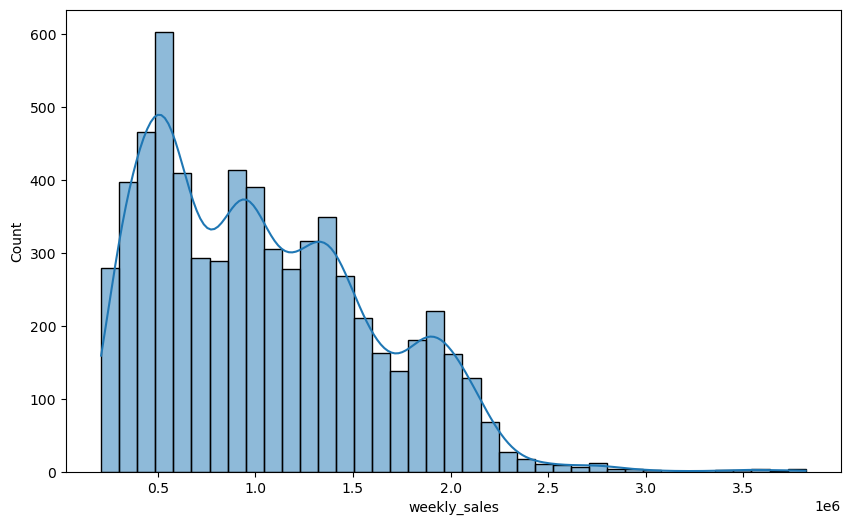

In [13]:
plt.figure(figsize=(10, 6))
sns.histplot(x = "weekly_sales", data = df, kde = True)
len(df.weekly_sales)

<Axes: xlabel='temperature', ylabel='Count'>

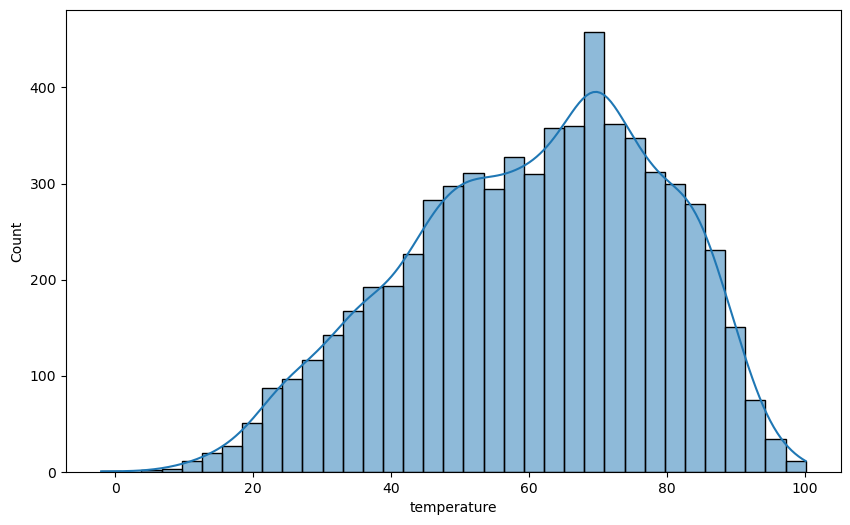

In [14]:
plt.figure(figsize=(10, 6))
sns.histplot(x = "temperature", data = df, kde = True)

<Axes: xlabel='fuel_price', ylabel='Count'>

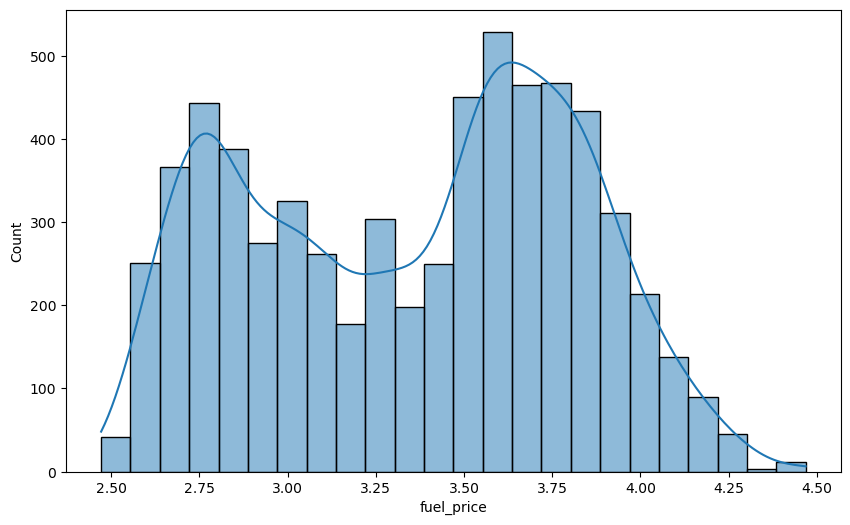

In [15]:
plt.figure(figsize=(10, 6))
sns.histplot(x = "fuel_price", data = df, kde = True)

<Axes: xlabel='cpi', ylabel='Count'>

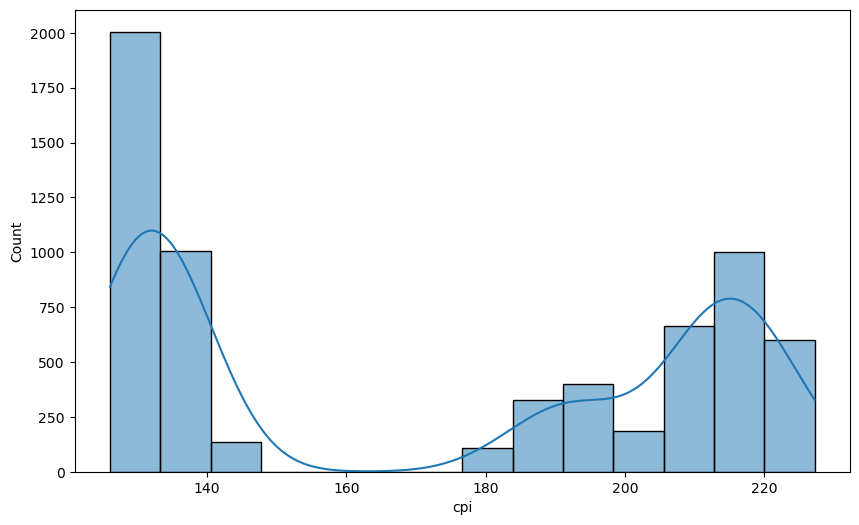

In [16]:
plt.figure(figsize=(10, 6))
sns.histplot(x = "cpi", data = df, kde = True)

<Axes: xlabel='unemployment', ylabel='Count'>

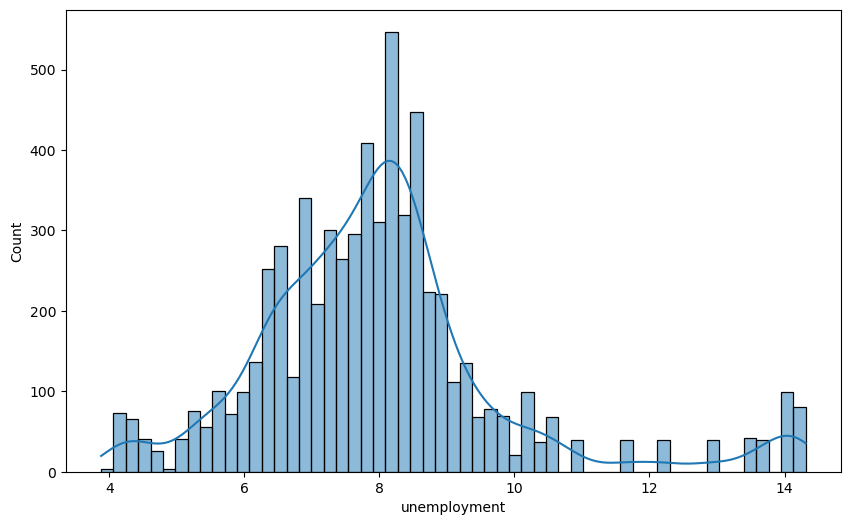

In [17]:
plt.figure(figsize=(10, 6))
sns.histplot(x = "unemployment", data = df, kde = True)

6435

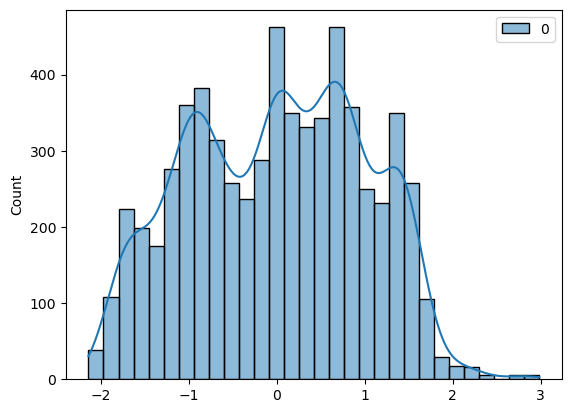

In [18]:
from sklearn.preprocessing import power_transform
weekly_sales_pt = power_transform(df[['weekly_sales']], method = "box-cox")
sns.histplot(weekly_sales_pt, kde = True)
len(weekly_sales_pt)

In [19]:
df.columns

Index(['store', 'date', 'weekly_sales', 'holiday_flag', 'temperature',
       'fuel_price', 'cpi', 'unemployment', 'year', 'quarter', 'season',
       'month', 'month_name', 'week', 'day_of_week'],
      dtype='object')

([<matplotlib.patches.Wedge at 0x7a74de827940>,
 [Text(-1.073561123911563, 0.23972174124543214, 'working_day'),
  Text(1.0735611183004703, -0.23972176637394407, 'holiday')],
 [Text(-0.5855787948608525, 0.13075731340659932, '93.0%'),
  Text(0.5855787918002564, -0.13075732711306037, '7.0%')])

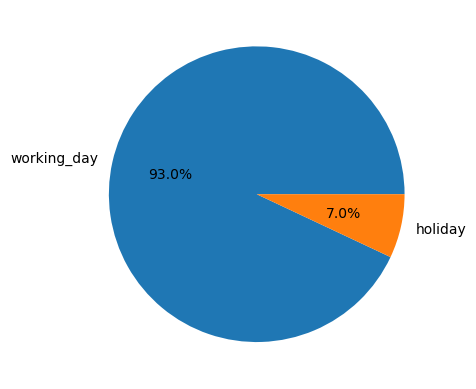

In [20]:
plt.pie(df.holiday_flag.value_counts(), labels = ['working_day','holiday'], autopct='%1.1f%%')

([<matplotlib.patches.Wedge at 0x7a74de77aa60>,
 [Text(0.7019109381350312, 0.8469480709738942, 'Summer'),
  Text(-0.9506077246399912, 0.55348437543871, 'Spring'),
  Text(-0.5430091300264092, -0.9566300668011446, 'Winter'),
  Text(0.8546070433831487, -0.6925653769861103, 'Fall')],
 [Text(0.382860511710017, 0.4619716750766695, '28.0%'),
  Text(-0.518513304349086, 0.3019005684211145, '27.3%'),
  Text(-0.2961867981962231, -0.5217982182551697, '23.1%'),
  Text(0.4661492963908084, -0.3777629329015147, '21.7%')])

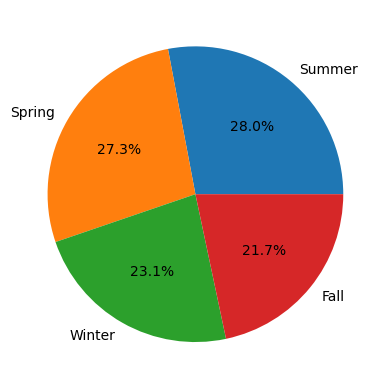

In [21]:
season_counts = df['season'].value_counts()
plt.pie(season_counts, labels = season_counts.index, autopct='%1.1f%%')

In [26]:
df.columns

Index(['store', 'date', 'weekly_sales', 'holiday_flag', 'temperature',
       'fuel_price', 'cpi', 'unemployment', 'year', 'quarter', 'season',
       'month', 'month_name', 'week', 'day_of_week'],
      dtype='object')

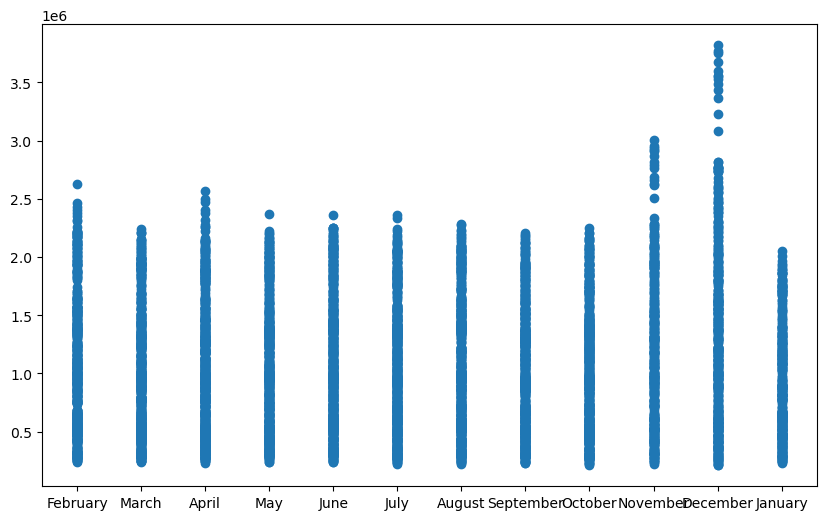

In [34]:
plt.figure(figsize=(10, 6))
plt.scatter(df.month_name, df.weekly_sales)

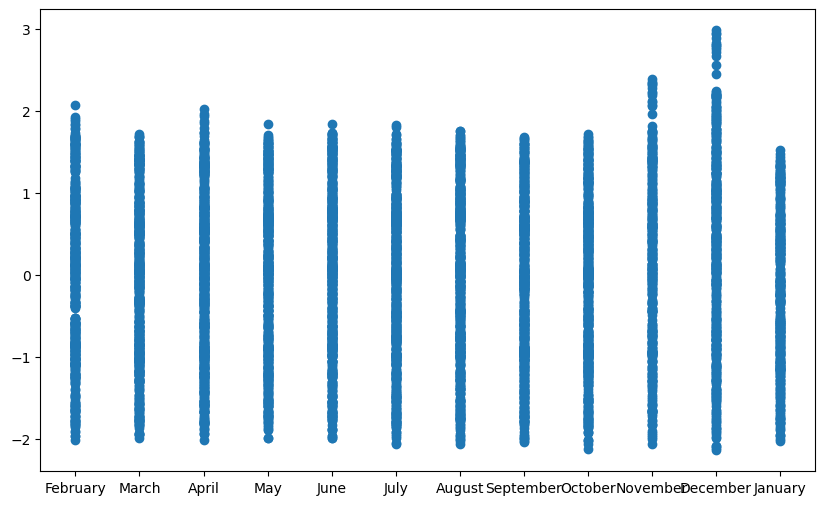

In [36]:
plt.figure(figsize=(10, 6))
plt.scatter(df.month_name, weekly_sales_pt)